In [34]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import warnings


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 2. Load the Dataset

In [7]:
file_path = "customer_segmentation_data.csv"  # Make sure this matches the uploaded file name
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
print(df.head())


   CustomerID  Age  Annual_Income_k  Spending_Score
0           1   58               65              17
1           2   25               54               6
2           3   19              110              40
3           4   65               56              47
4           5   35              150               6


## 3. Understand the Data

In [9]:
information =df.info()
print(information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CustomerID       200 non-null    int64
 1   Age              200 non-null    int64
 2   Annual_Income_k  200 non-null    int64
 3   Spending_Score   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None


In [13]:
#null val

print(df.isnull().sum())
print(df.isnull())

CustomerID         0
Age                0
Annual_Income_k    0
Spending_Score     0
dtype: int64
     CustomerID    Age  Annual_Income_k  Spending_Score
0         False  False            False           False
1         False  False            False           False
2         False  False            False           False
3         False  False            False           False
4         False  False            False           False
..          ...    ...              ...             ...
195       False  False            False           False
196       False  False            False           False
197       False  False            False           False
198       False  False            False           False
199       False  False            False           False

[200 rows x 4 columns]


In [14]:
# Display statistics
print(df.describe())

       CustomerID         Age  Annual_Income_k  Spending_Score
count  200.000000  200.000000       200.000000       200.00000
mean   100.500000   43.770000        77.710000        51.57500
std     57.879185   15.259138        39.746507        28.67465
min      1.000000   18.000000        15.000000         1.00000
25%     50.750000   31.000000        41.750000        27.75000
50%    100.500000   43.000000        75.500000        52.00000
75%    150.250000   58.000000       114.500000        79.00000
max    200.000000   70.000000       150.000000       100.00000


## 4. Select Features for Clustering

In [26]:
 # Select relevant features
X = df[['Annual_Income_k', 'Spending_Score']]

# Display selected features
print(X.head())


   Annual_Income_k  Spending_Score
0               65              17
1               54               6
2              110              40
3               56              47
4              150               6


5. Find Optimal Clusters Using Elbow Method
The Elbow Method helps determine the best value for K.

F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

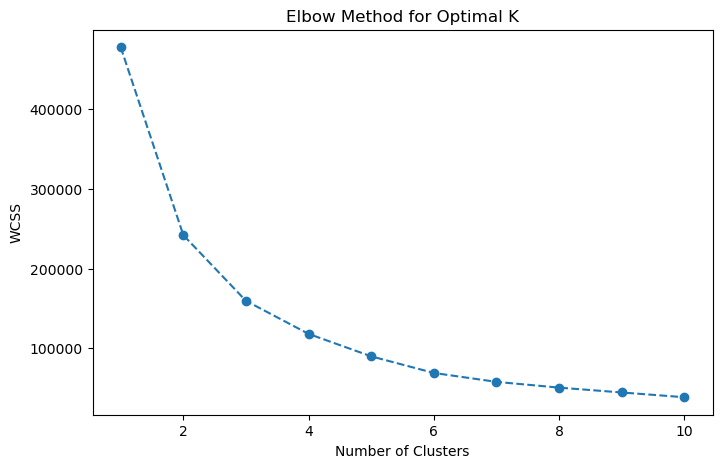

In [35]:
# Use the Elbow Method to find the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

warnings.filterwarnings("ignore")
